In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import os 
from numpy import random

In [16]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\bulsa': ['.android', '.atom', '.cache', '.conda', '.condarc', '.continuum', '.eclipse', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.node_repl_history', '.opera', '.p2', '.ssh', '.streamlit', '.VirtualBox', '.vscode', '2009.csv', '3.4_with_perfect', '3.5', 'anaconda3', 'AppData', 'Application Data', 'archive.zip', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'eclipse', 'eclipse-workspace', 'Favorites', 'Final_project', 'Hotels_in_india.csv', 'hw2.ipynb', 'IdeaProjects', 'IntelGraphicsProfiles', 'L1_Python_Basics.ipynb', 'lasttwo.ipynb', 'Links', 'Local Settings', 'Music', 'My Documents', 'my_311_data.csv', 'netflix_titles.csv', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{6ec2e856-4d9f-11ec-9822-8c47be171a1b}.TM.blf', 'NTUSER.DAT{6ec2e856-4d9f-11ec-9822-8c47be171a1b}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{6ec2e856-4d9f-11ec-9822-8c47be171a1b}.TMContainer00000000000000000002.regtrans-ms

In [3]:
cd

C:\Users\bulsa


In [4]:
csv_path_files_list = []
for i in range(2009,2018):
    csv_path_files_list.append('Final_project/'+ str(i) +'.csv')

csv_list = []

for file in sorted(csv_path_files_list):
    csv_list.append(pd.read_csv(file).assign(File_Name = os.path.basename(file)))

csv_list_delay = []
for csv_list_year in csv_list:
    csv_list_delay.append(csv_list_year[(csv_list_year['ARR_DELAY'] > 0)])
del csv_list

In [10]:
a_with_delay_dest = pd.concat(csv_list_delay, ignore_index=True)

C:\Users\bulsa\AppData\Local\Temp\ipykernel_8140\1271648276.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(arr, label='Delay')


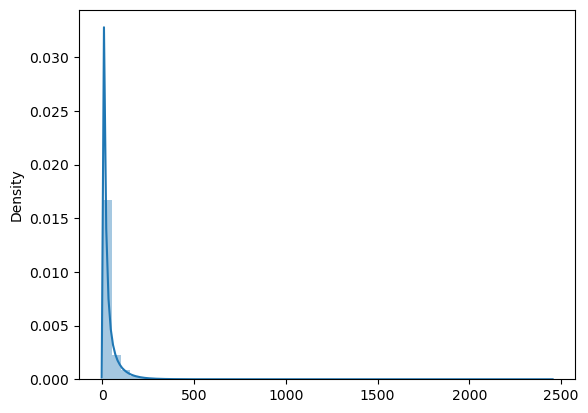

C:\Users\bulsa\AppData\Local\Temp\ipykernel_8140\1271648276.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.pareto(a=2, size=10000), label='pareto')


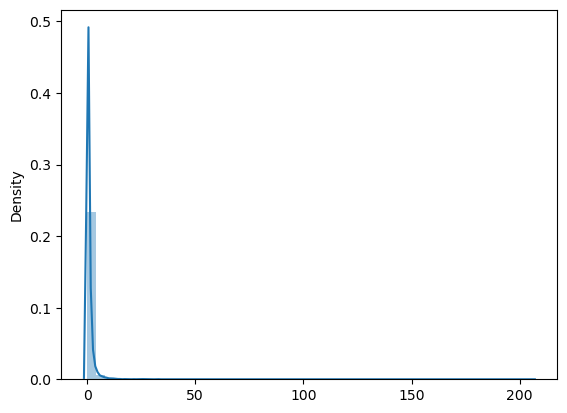

In [27]:
# Datas matching theoretical distribution
import seaborn as sns
arr = a_with_delay_dest['ARR_DELAY'].to_numpy()
# print(arr.shape, np.amin(arr), np.amax(arr))
sns.distplot(arr, label='Delay')
plt.show()
sns.distplot(random.pareto(a=2, size=10000), label='pareto')
# sns.distplot(random.exponential(scale=2, size=10), hist=False, label='exponential')

plt.show()


In [28]:
year = ['2014', '2015', '2016', '2017', '2018']

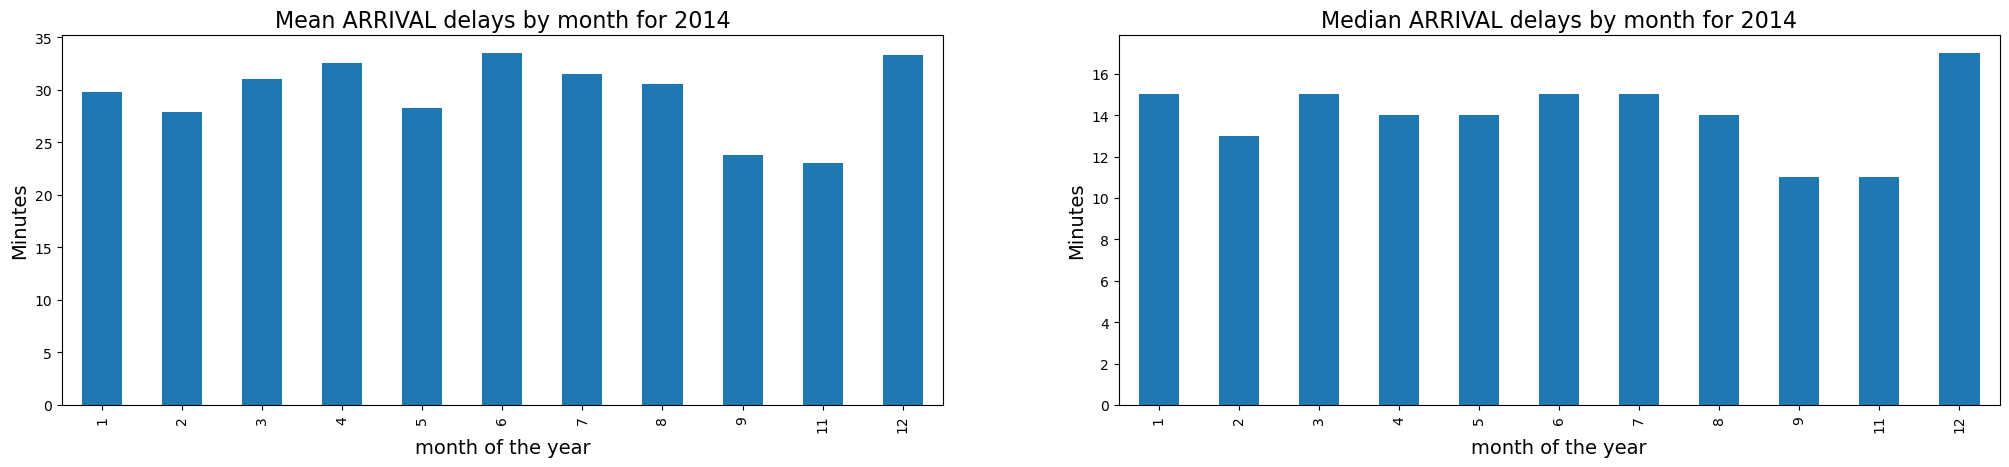

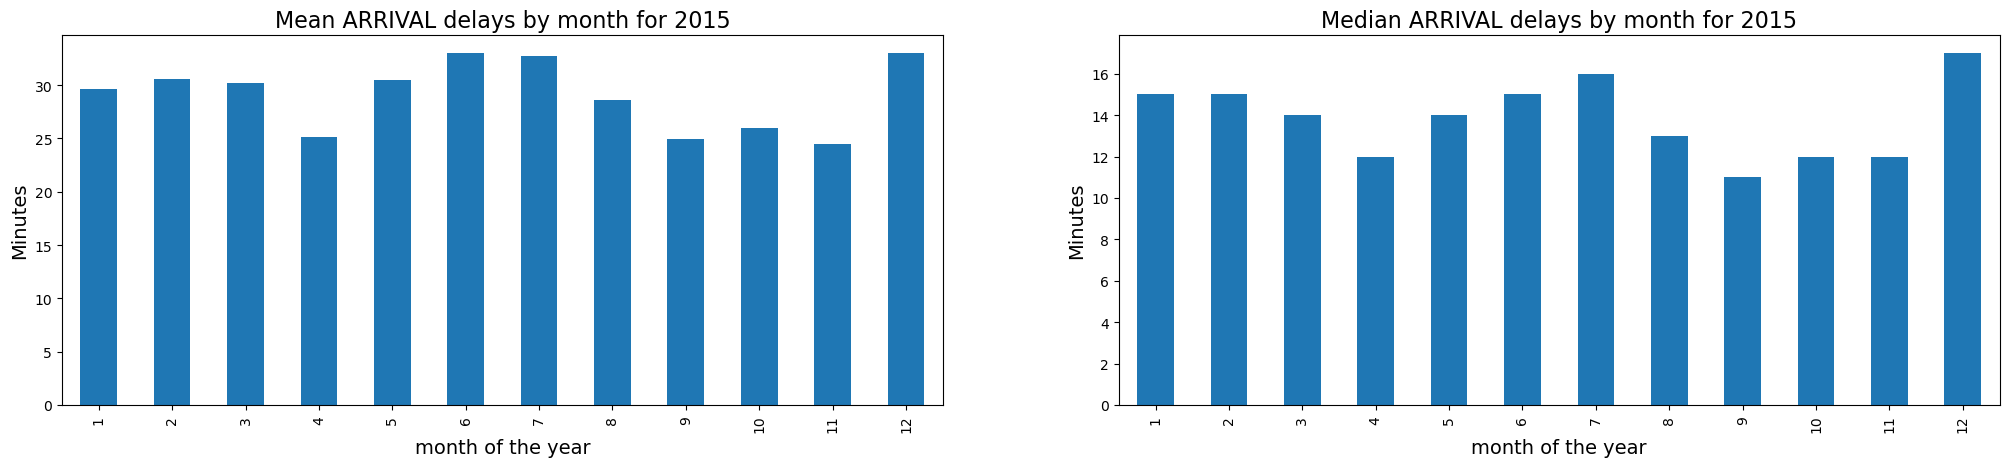

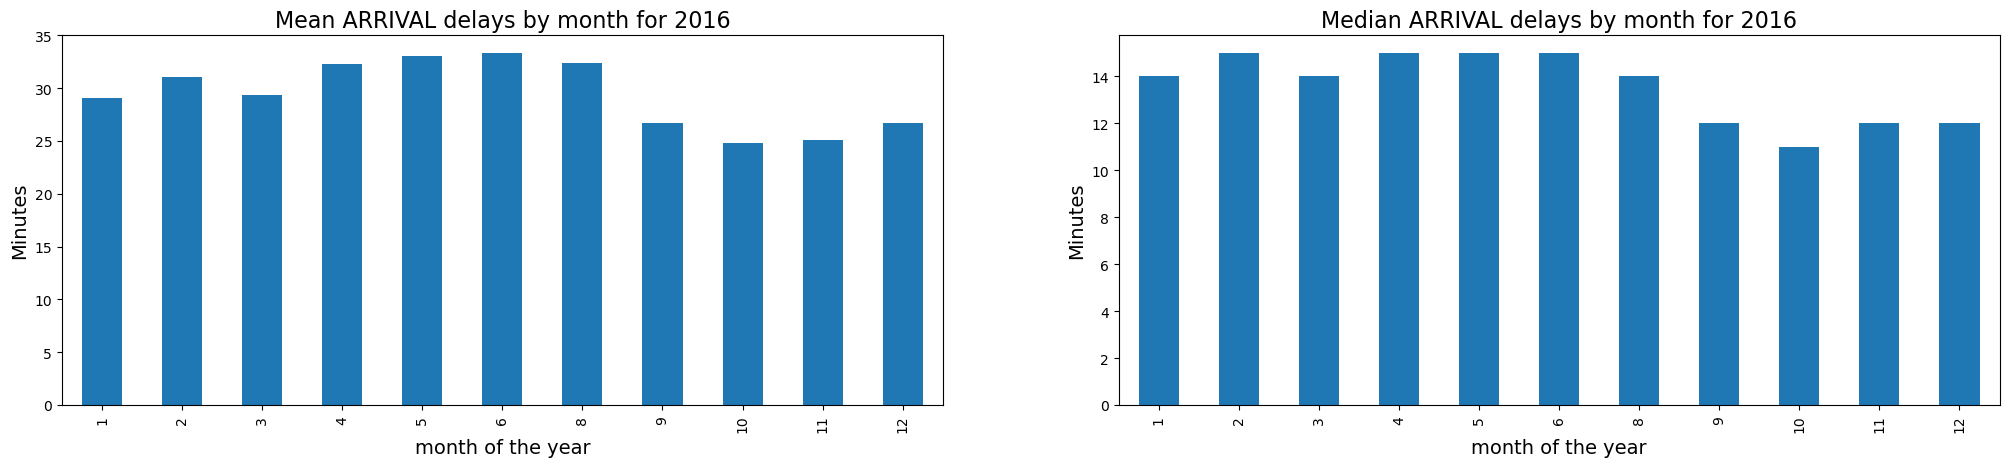

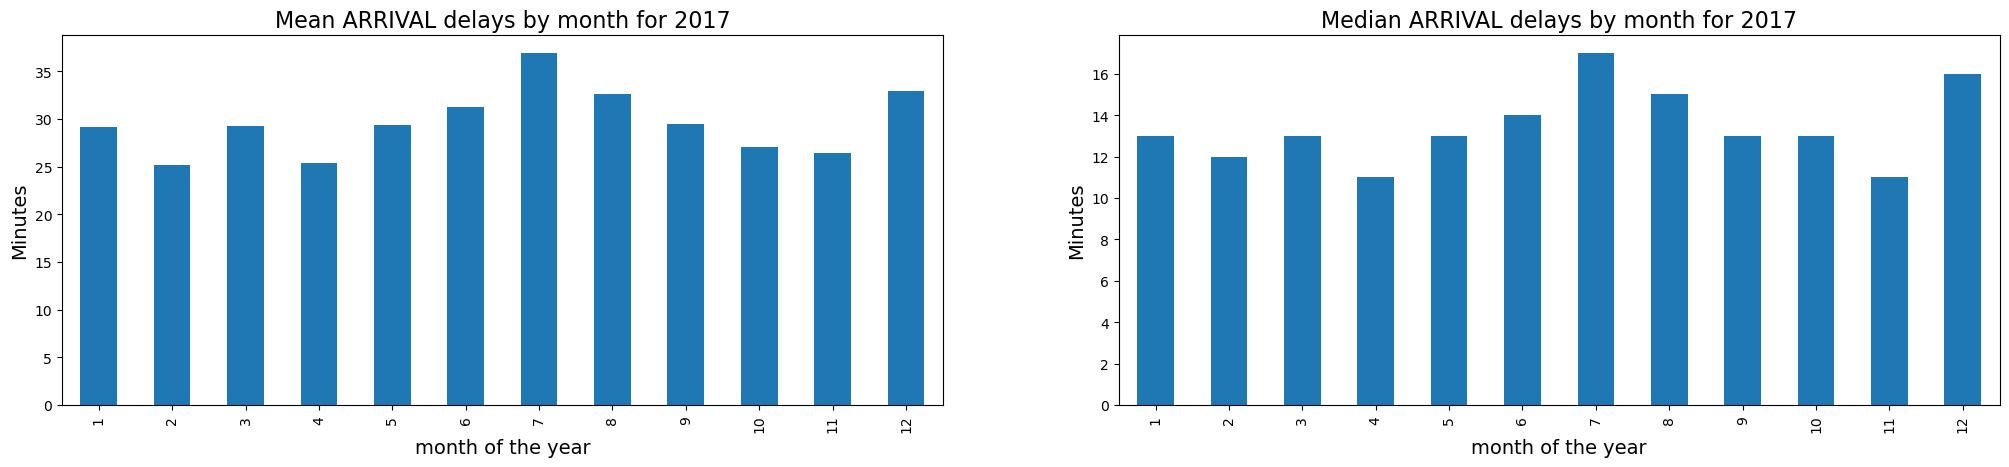

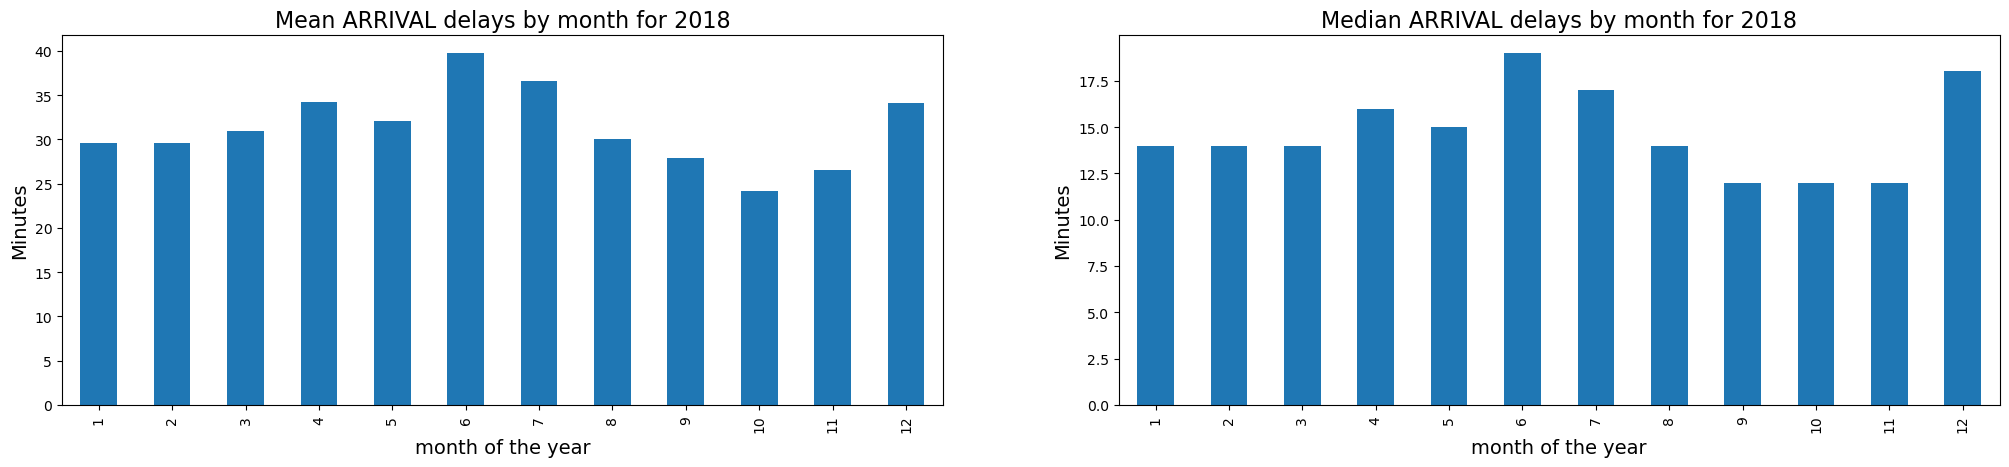

IndexError: list index out of range

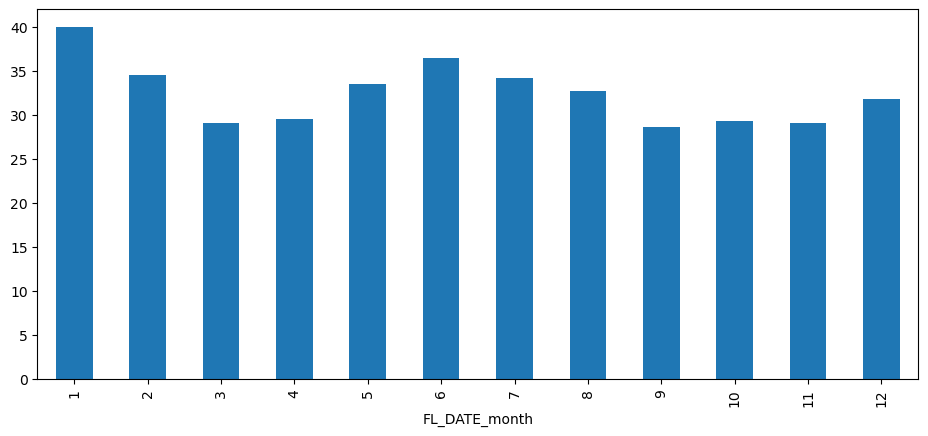

In [35]:
# Delay per month (2014-2018), mean and median value

for i in range(len(csv_list_delay)):
    csv_list_delay[i]['FL_DATE_month'] = pd.to_datetime(csv_list_delay[i]['FL_DATE']).dt.month
    
    plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)

    plt.subplot(2, 2 ,1)
    csv_list_delay[i].groupby('FL_DATE_month').ARR_DELAY.mean().plot.bar()
    plt.title('Mean ARRIVAL delays by month for ' + year[i], fontsize=16)
    plt.ylabel('Minutes', fontsize=14)
    plt.xlabel('month of the year', fontsize=14)

    plt.subplot(2, 2 ,2)
    csv_list_delay[i].groupby('FL_DATE_month').ARR_DELAY.median().plot.bar()
    plt.title('Median ARRIVAL delays by month for ' + year[i], fontsize=16)
    plt.ylabel('Minutes', fontsize=14)
    plt.xlabel('month of the year', fontsize=14)

    plt.show()

In [30]:
# Count number of delays per airline
count = []
for i in range(len(csv_list_delay)):
    # plt.figure()
    count.append(csv_list_delay[i].groupby('OP_CARRIER').ARR_DELAY.count().sort_values(ascending=False))

count_disp = pd.concat(count, axis=1, ignore_index=True, sort='False')
count_disp.columns = ['2010','2011','2012','2013','2014', '2015', '2016', '2017', '2018']
display(count_disp)

C:\Users\bulsa\AppData\Local\Temp\ipykernel_8140\3723526852.py:7: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  count_disp = pd.concat(count, axis=1, ignore_index=True, sort='False')


,2010,2011,2012,2013,2014,2015,2016,2017,2018
OP_CARRIER,,,,,,,,,
9E,84778.0,93743.0,NaN,NaN,94678.0,NaN,NaN,NaN,NaN
AA,208338.0,196541.0,205980.0,216233.0,209819.0,226439.0,252191.0,335945.0,316561.0
AS,50732.0,40454.0,40614.0,42425.0,53385.0,56668.0,56953.0,55062.0,67276.0
B6,69879.0,77977.0,91779.0,81756.0,102075.0,96776.0,101998.0,110340.0,116031.0
CO,106471.0,97521.0,112282.0,NaN,NaN,NaN,NaN,NaN,NaN
DL,175746.0,298199.0,249252.0,212049.0,245558.0,264090.0,250840.0,237527.0,243187.0
EV,139335.0,103307.0,126709.0,264277.0,301800.0,277750.0,213217.0,156528.0,109946.0
F9,39343.0,34597.0,38493.0,40111.0,40854.0,42698.0,41232.0,35517.0,36560.0
FL,110334.0,84914.0,82295.0,64948.0,72243.0,27955.0,NaN,NaN,NaN


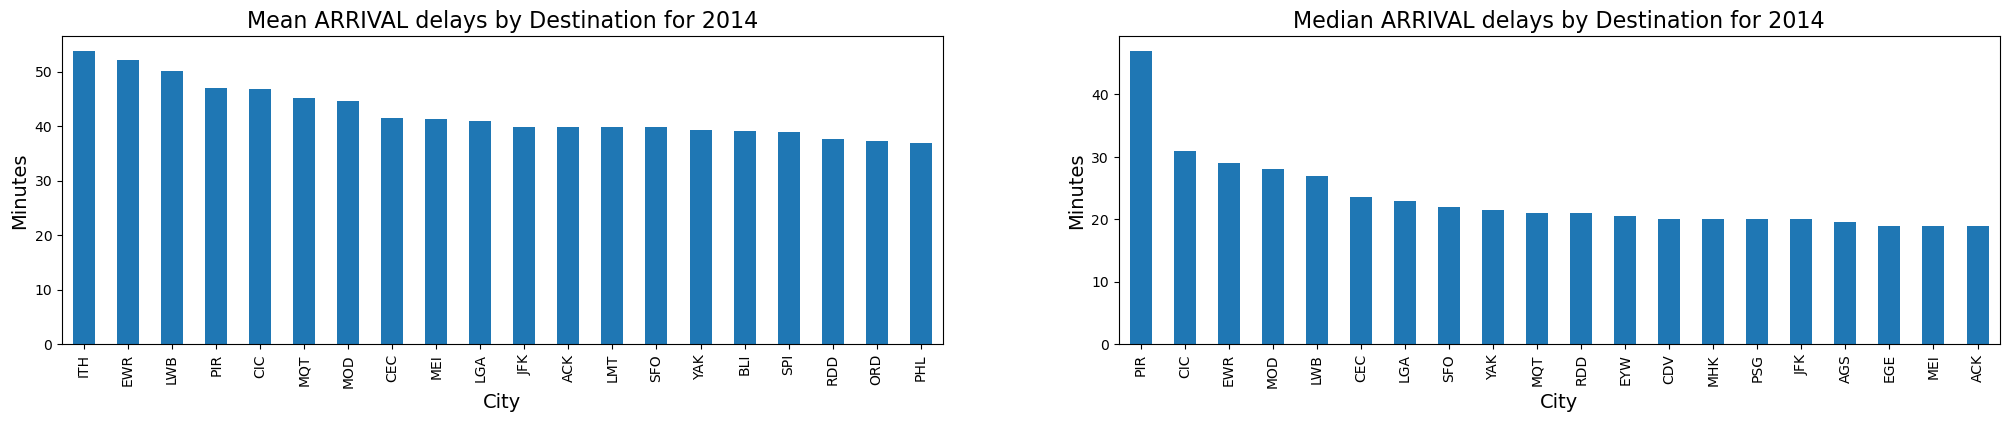

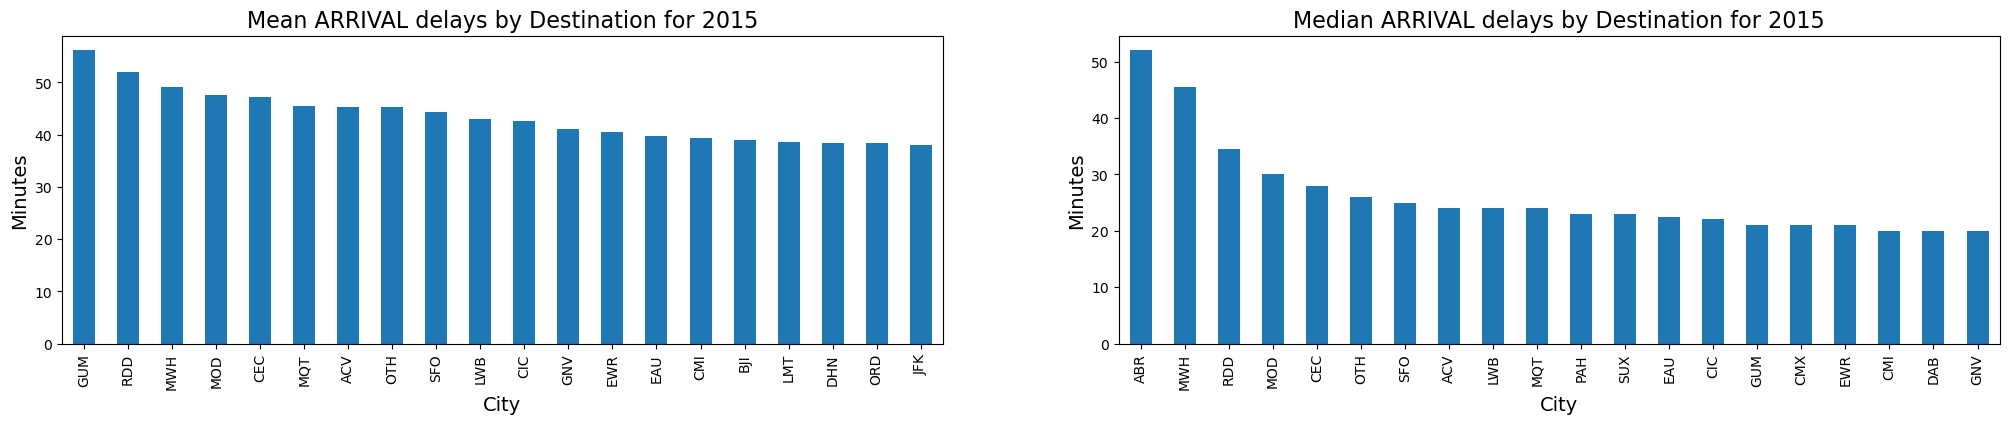

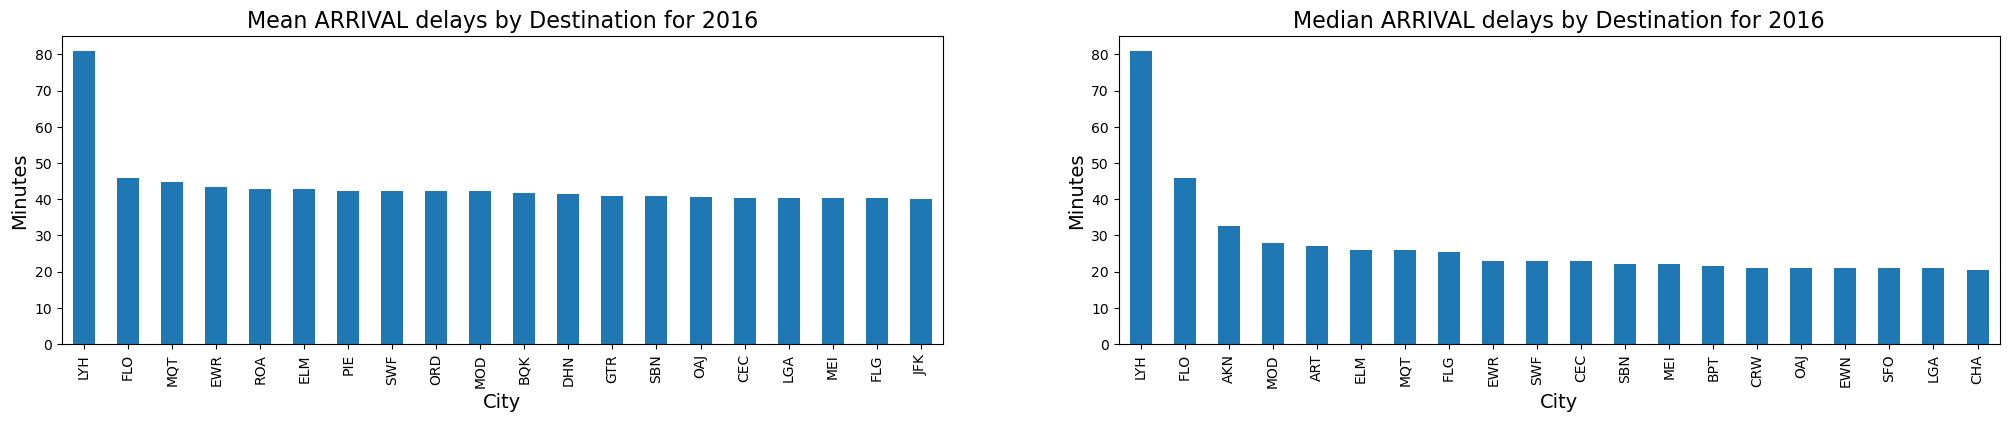

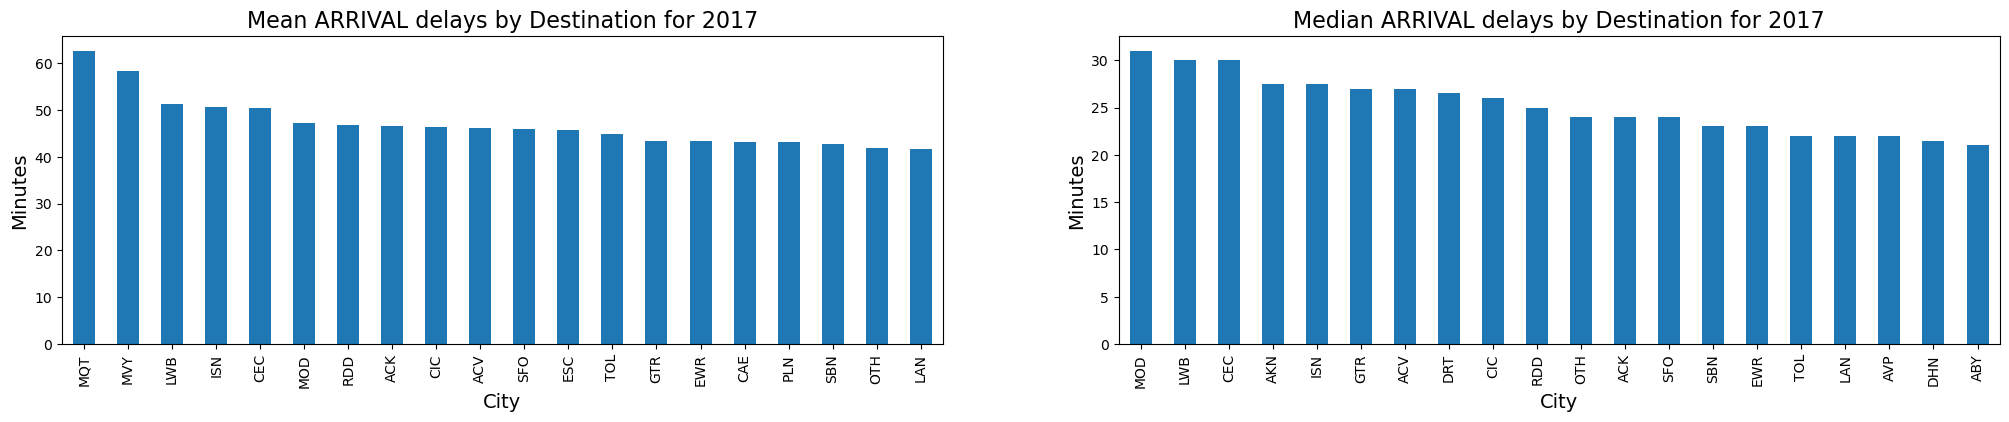

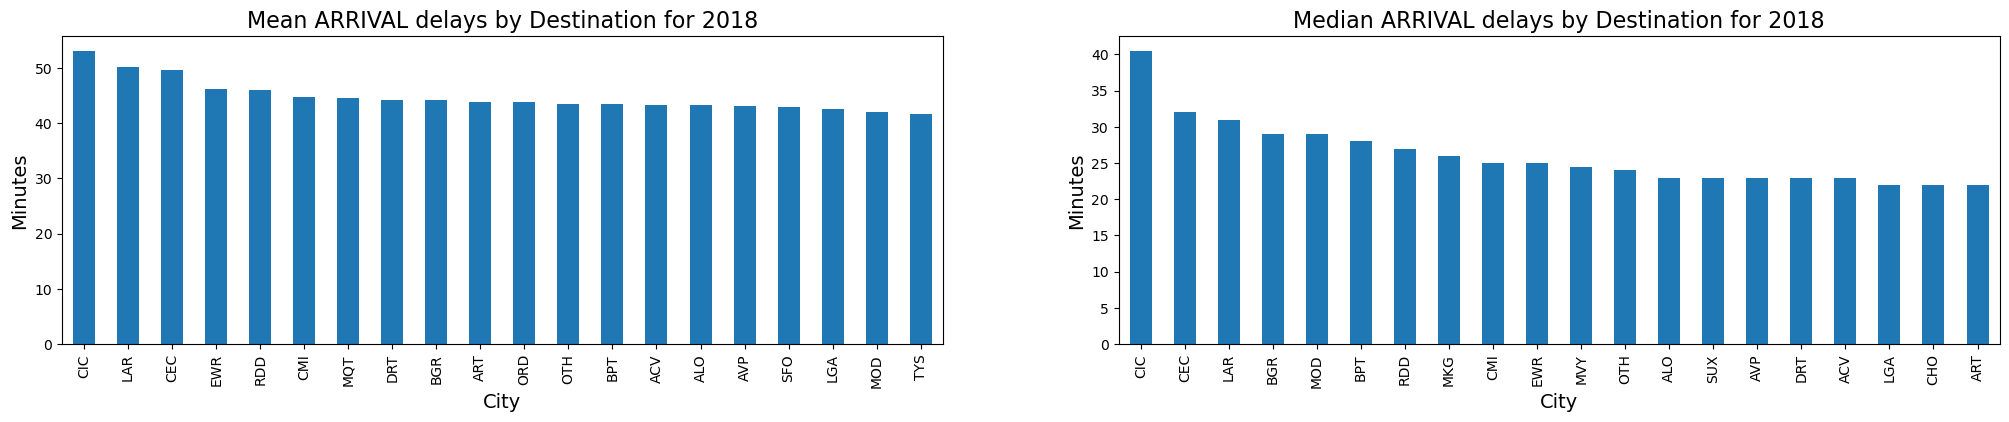

IndexError: list index out of range

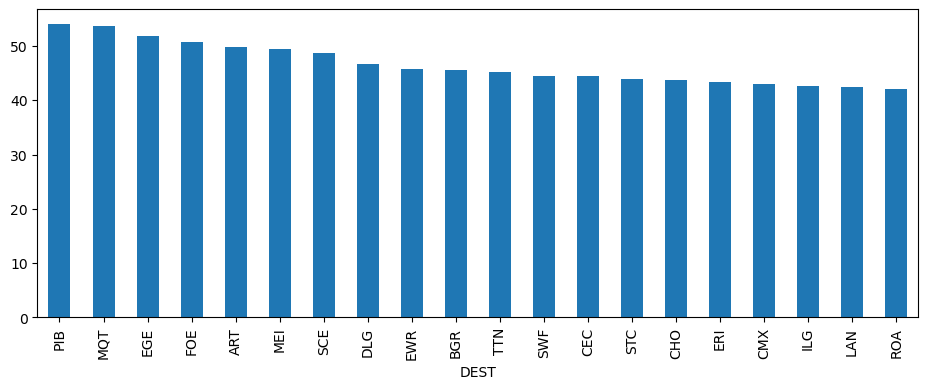

In [31]:
# Delay per Destination (2014-2018), mean and median value

for i in range(len(csv_list_delay)):
    plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 1)

    plt.subplot(2, 2 ,1)
    mean_origin = csv_list_delay[i].groupby('DEST').ARR_DELAY.mean().sort_values(ascending=False)
    mean_origin[:20].plot.bar()
    plt.title('Mean ARRIVAL delays by Destination for ' + year[i], fontsize=16)
    plt.ylabel('Minutes', fontsize=14)
    plt.xlabel('City', fontsize=14)

    plt.subplot(2, 2 ,2)
    median_origin = csv_list_delay[i].groupby('DEST').ARR_DELAY.median().sort_values(ascending=False)
    median_origin[:20].plot.bar()
    plt.title('Median ARRIVAL delays by Destination for ' + year[i], fontsize=16)
    plt.ylabel('Minutes', fontsize=14)
    plt.xlabel('City', fontsize=14)

    plt.show()

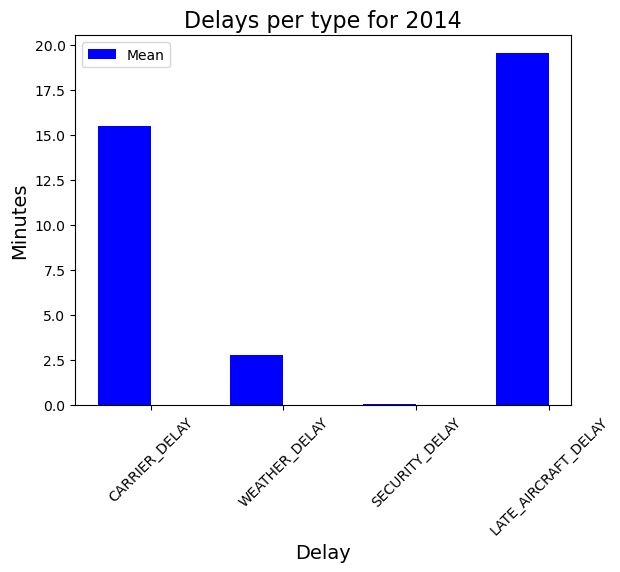

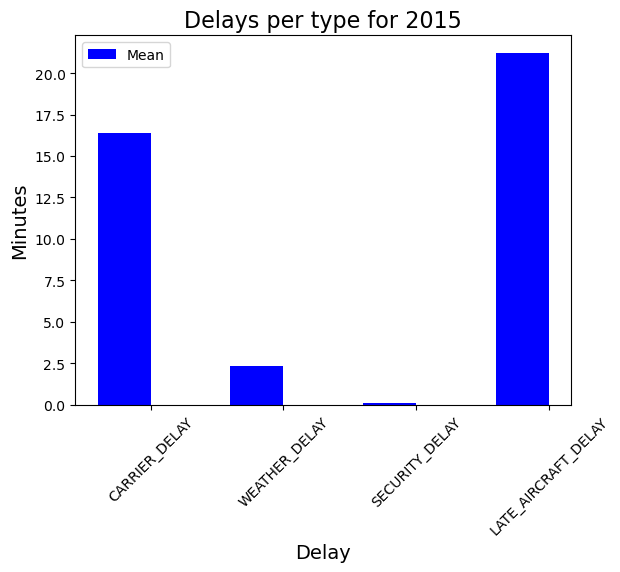

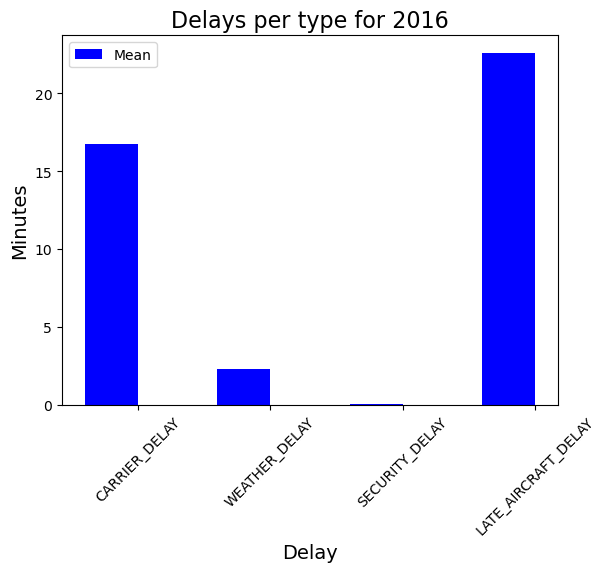

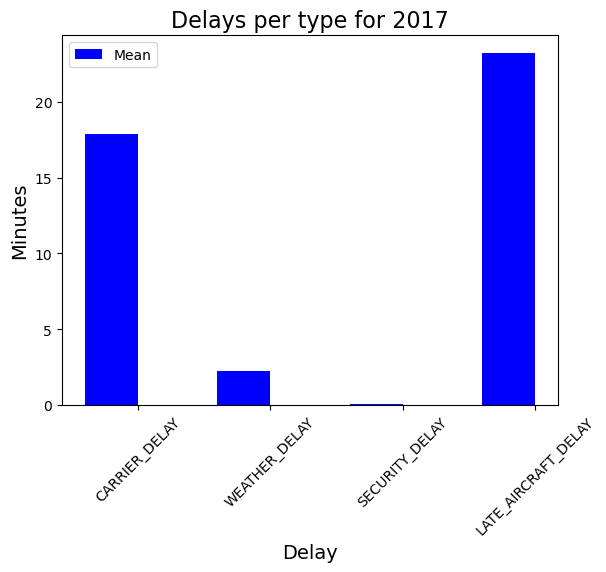

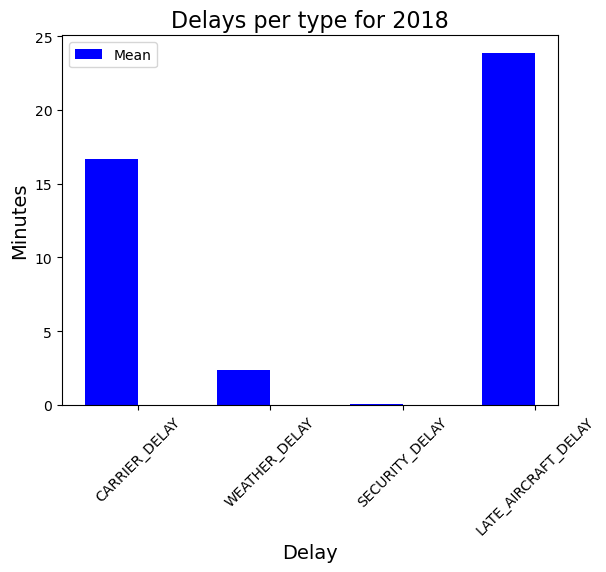

IndexError: list index out of range

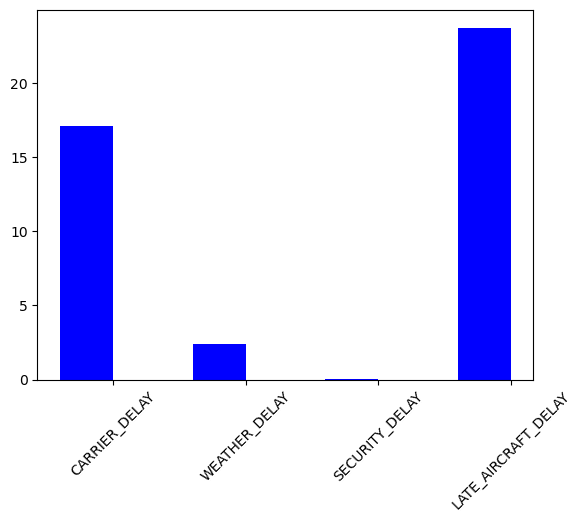

In [34]:
# Different types of delays by year 
delays = ['CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
for i in range(len(csv_list_delay)):
    mean2 = csv_list_delay[i][['CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].mean()
    X = np.arange(len(delays))
    fig = plt.figure()
    plt.bar(X - 0.2, mean2, color = 'b', width = 0.40, label = 'Mean')
    plt.xticks(X, delays, rotation = 45)
    plt.title('Delays per type for ' + year[i], fontsize=16)
    plt.ylabel('Minutes', fontsize=14)
    plt.xlabel('Delay', fontsize=14)
    plt.legend()
    plt.show()

In [5]:
cd

C:\Users\bulsa
